Meilleurs paramètres pour 'Disease': {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix for Disease Prediction:
[[6622    0]
 [   0  177]]

Classification Report for Disease Prediction:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6622
           1       1.00      1.00      1.00       177

    accuracy                           1.00      6799
   macro avg       1.00      1.00      1.00      6799
weighted avg       1.00      1.00      1.00      6799

Meilleurs paramètres pour 'Gravité': {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix for Asthma Severity Prediction among Predicted Cases:
[[ 73   0]
 [  0 104]]

Classification Report for Asthma Severity Prediction among Predicted Cases:
              precision    recall  f1-score   support

     moyenne       1.00      1.00      1.00        73
      élevée       1.00      1.00      1.00       104

    accuracy       

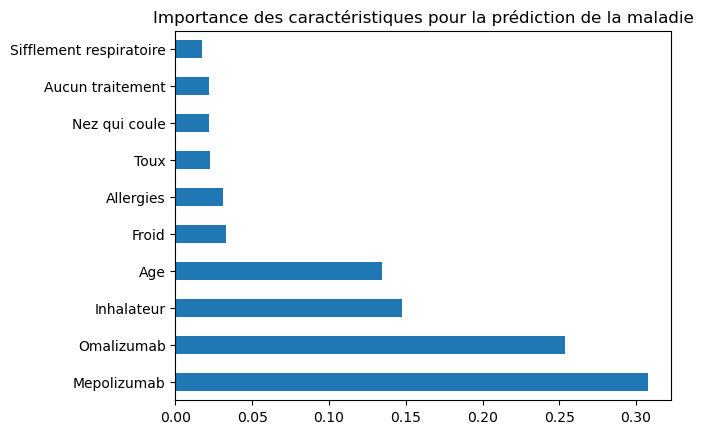

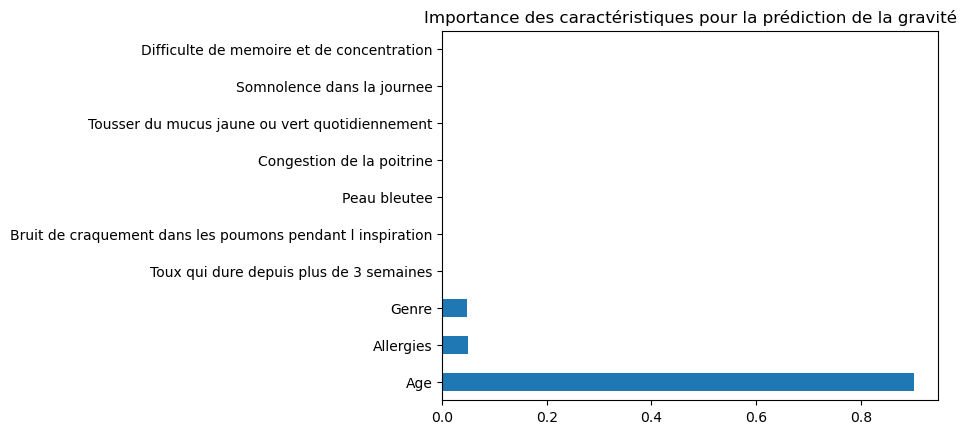

Predicted Disease: Yes
Probability of Disease Prediction: [0. 1.]
Predicted Severity Level: élevée
Probability of Severity Level Prediction: [0. 1.]

Features set to 1:
Genre
Congestion de la poitrine
Bouche seche
Fievre basse, hypothermie
Sueurs dans la nuit
Pauses respiratoires
Toux seche persistante
Essouflement durant le sommeil
Mal de gorge
Sautes d humeur
Perte de poids a cause d un manque d appetit
Bout des doigts et des orteils plus gros
Allergies
Toux chronique
Froid
Diarrhee
Toux seche
Oedeme
Evanouissements
Palpitations du coeur
Courbatures
Douleur dans tout le corps
Transpiration excessive
Toux seche.1
Chimiotherapie
Diuretique
Ventilation intrapulmonaire
Mepolizumab
Omalizumab
Reeducation pulmonaire
Aspirine
Chirurgie dans les 3 derniers mois
Rayon X dans les 3 derniers mois
Tousser du sang
Battements de coeur rapides
Fatigue
Fievre
Baisse d energie
Frissonnements
Douleur a la poitrine
Essouflement
Nausees
Sifflement respiratoire
Inhalateur
Age: 34


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Charger les données
fichier = pd.read_csv("C:\\Users\\PC\\Desktop\\projet\\Web\\traitement_grav_final.csv")

# Préparer les données
X = fichier.drop(['Gravité', 'Disease'], axis=1)
y_disease = fichier['Disease']
y_gravity = fichier['Gravité']

# Split dataset
X_train, X_test, y_train_disease, y_test_disease, y_train_gravity, y_test_gravity = train_test_split(X, y_disease, y_gravity, test_size=0.2, random_state=1)

# Paramètres pour la recherche par grille
params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# Modèle pour prédire la présence d'une maladie
clf_disease = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
clf_disease.fit(X_train, y_train_disease)
print("Meilleurs paramètres pour 'Disease':", clf_disease.best_params_)
y_pred_disease = clf_disease.predict(X_test)

# Affichage des résultats pour la prédiction de la maladie
print("Confusion Matrix for Disease Prediction:")
print(confusion_matrix(y_test_disease, y_pred_disease))
print("\nClassification Report for Disease Prediction:")
print(classification_report(y_test_disease, y_pred_disease))

# Modèle pour prédire la gravité des crises
clf_gravity = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
clf_gravity.fit(X_train[y_train_disease == 1], y_train_gravity[y_train_disease == 1])
print("Meilleurs paramètres pour 'Gravité':", clf_gravity.best_params_)
y_pred_gravity = clf_gravity.predict(X_test[y_pred_disease == 1])
actual_gravity = y_test_gravity[y_pred_disease == 1]

# Affichage des résultats pour la prédiction de la gravité
print("Confusion Matrix for Asthma Severity Prediction among Predicted Cases:")
print(confusion_matrix(actual_gravity, y_pred_gravity))
print("\nClassification Report for Asthma Severity Prediction among Predicted Cases:")
print(classification_report(actual_gravity, y_pred_gravity))


# Affichage de l'importance des caractéristiques pour la prédiction de la maladie
feature_importances_disease = pd.Series(clf_disease.best_estimator_.feature_importances_, index=X.columns)
feature_importances_disease.nlargest(10).plot(kind='barh')
plt.title('Importance des caractéristiques pour la prédiction de la maladie')
plt.show()

# Tracé de l'arbre de décision pour la prédiction de la maladie et sauvegarde
plt.figure(figsize=(20,10))
plot_tree(clf_disease.best_estimator_, filled=True, feature_names=X.columns, class_names=['Non', 'Oui'])
plt.title('Arbre de décision pour la prédiction de la maladie - Meilleur modèle')
plt.savefig("C:\\Users\\PC\\Desktop\\Decision_Tree_Disease.png")  # Chemin où vous souhaitez enregistrer le fichier
plt.close()  # Ferme le plot actuel pour libérer la mémoire

# Tracé de l'arbre de décision pour la prédiction de la gravité des crises et sauvegarde
plt.figure(figsize=(20,10))
plot_tree(clf_gravity.best_estimator_, filled=True, feature_names=X_train.columns, class_names=['Moyenne', 'Élevée'])
plt.title('Arbre de décision pour la prédiction de la gravité des crises - Meilleur modèle')
plt.savefig("C:\\Users\\PC\\Desktop\\Decision_Tree_Gravity.png")  # Chemin où vous souhaitez enregistrer le fichier
plt.close()  # Ferme le plot actuel pour libérer la mémoire

# Affichage de l'importance des caractéristiques pour la prédiction de la gravité
feature_importances_gravity = pd.Series(clf_gravity.best_estimator_.feature_importances_, index=X_train.columns)
feature_importances_gravity.nlargest(10).plot(kind='barh')
plt.title('Importance des caractéristiques pour la prédiction de la gravité')
plt.show()


import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Assuming age should be a random integer between, say, 0 and 100
if 'Age' in X.columns:
    # Generate a random test case with all other features as binary
    random_sample = np.random.randint(2, size=len(X.columns))
    test_df = pd.DataFrame([random_sample], columns=X.columns)
    # Set a more realistic random age
    test_df['Age'] = np.random.randint(0, 100)
else:
    # Generate a random test case with all features as binary
    random_sample = np.random.randint(2, size=len(X.columns))
    test_df = pd.DataFrame([random_sample], columns=X.columns)

# Predict the presence of the disease
predicted_disease = clf_disease.predict(test_df)
predicted_disease_prob = clf_disease.predict_proba(test_df)[0]

# Display the predicted results
print("Predicted Disease:", 'Yes' if predicted_disease[0] == 1 else 'No')
print("Probability of Disease Prediction:", predicted_disease_prob)

# Predict the severity if the disease is present
if predicted_disease[0] == 1:
    predicted_gravity = clf_gravity.predict(test_df)
    predicted_gravity_prob = clf_gravity.predict_proba(test_df)[0]
    print("Predicted Severity Level:", predicted_gravity[0])
    print("Probability of Severity Level Prediction:", predicted_gravity_prob)

# Display features set to 1, including the age
print("\nFeatures set to 1:")
for feature, value in test_df.iloc[0].items():
    if value == 1:
        print(feature)

# Additionally, show the age
print("Age:", test_df['Age'].iloc[0])








